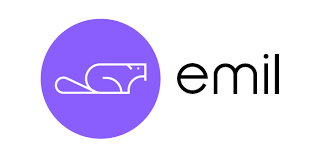

# TD VISUALISATION : visualisation interactive avec Facets, les widgets et déploiement d'une application web avec Voilà et Binder

L'objectif de ce TD est de :
- réaliser une visualisation interactive avec les Widgets permettant d'analyser le jeu de données
- transfomer le notebook de visualisation interactive en webapp (application web) avec Voilà
- déployer et partager cette application web avec ngrok

## I. Manipulation de données

### a) Installation des librairies de visualisation

Exécutez le script d'installation suivant

In [ ]:
import sys
!{sys.executable} -m pip install facets-overview protobuf sympy networkx scikit-learn

Loadez les librairies suivantes

In [ ]:
import numpy as np
from collections import Counter
from IPython.core.display import display, HTML
import base64

import pandas as pd

from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator
import plotly.express as px

### b) Chargement du dataset
Les données utilisés pour ce TD sont issus de Tiller, un logiciel de caisses enregistreuses racheté par sumup recemment.
Il s'agit d'un csv où chaque ligne représente le détail d'une commande (ou orders). 

Vous les avez normalement déjà en votre possesion mais sinon elles sont disponibles à [cette adresse](https://drive.google.com/file/d/1G7Jbq_m-tJrHRhL-44j8XFOVs_zPil_9/view?usp=sharing).

Loadez les données dans un DataFrame `df`.

In [ ]:
df = pd.read_csv('../Tiller_order_line.csv')

In [ ]:
print(df.shape)
df.head()

**Formatage**

Nous allons reprendre le même formating qu'au tp précédent. 

Exécutez le code ci-dessous.

In [ ]:
DATETIME_FORMAT = '%Y-%m-%d %H:%M:%S UTC'

# conversion en string
df['id_order_line'] = df['id_order_line'].astype(str)
df['id_order'] = df['id_order'].astype(str)

# formatage des dates
df['date_opended'] = pd.to_datetime(df['date_opended'], format=DATETIME_FORMAT)
df['date_created'] = pd.to_datetime(df['date_created'], format=DATETIME_FORMAT)

# II. Visualisation intéractive avec Facets


### a) Facets Overview
Overview donne aux utilisateurs une compréhension rapide de la distribution des valeurs à travers les variables de leurs ensembles de données. Cela permet de mettre en avant les valeurs aberantes, les valeurs manquantes, le biais qu'il peut y avoir en machine learning sur le jeu d'entrainement, de test, etc.

In [ ]:
# Create the feature stats for the datasets and stringify it.
import base64
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator

gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'all', 'table': df.sample(1000)}])
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")

# Display the facets overview visualization for this data
from IPython.core.display import display, HTML

HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

### b) Facets Dive

Dive est un outil permettant d'explorer de manière interactive un grand nombre de points de données à la fois. Il fournit une interface interactive pour explorer la relation entre les points de données à travers toutes les différentes caractéristiques d'un ensemble de données. Chaque élément individuel de la visualisation représente un point de données. Positionnez les éléments en les "facettant" ou en les classant dans plusieurs dimensions en fonction des valeurs de leurs caractéristiques.

Demo : https://pair-code.github.io/facets/quickdraw.html

In [ ]:
jsonstr = df.sample(1000).to_json(orient='records')
HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=jsonstr)
display(HTML(html))

# III. Exemples de visualisation intéractive avec les widgets

### a) Qu'est ce qu'un widget ?

La liste des widgets est disponible ici : https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html
        

### b) Exemples de visualisations interactives avec des widgets

**Graphe aléatoire avec NetworkX**

In [ ]:
from ipywidgets import interact
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

def random_lobster(n, m, k, p):
    return nx.random_lobster(n, p, p / m)

def powerlaw_cluster(n, m, k, p):
    return nx.powerlaw_cluster_graph(n, m, p)

def erdos_renyi(n, m, k, p):
    return nx.erdos_renyi_graph(n, p)

def newman_watts_strogatz(n, m, k, p):
    return nx.newman_watts_strogatz_graph(n, k, p)

def plot_random_graph(n, m, k, p, generator):
    g = generator(n, m, k, p)
    nx.draw(g)
    plt.show()

interact(plot_random_graph, n=(2,30), m=(1,10), k=(1,10), p=(0.0, 0.99, 0.001),
         generator=[
             ('lobster', random_lobster),
             ('power law', powerlaw_cluster),
             ('Newman-Watts-Strogatz', newman_watts_strogatz),
             (u'Erdős-Rényi', erdos_renyi),
         ]);

**Analyse de la fréquence d'un son**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive
from IPython.display import Audio, display
import numpy as np

def beat_freq(f1=220.0, f2=224.0):
    max_time = 3
    rate = 8000
    times = np.linspace(0,max_time,rate*max_time)
    signal = np.sin(2*np.pi*f1*times) + np.sin(2*np.pi*f2*times)
    display(Audio(data=signal, rate=rate))
    return signal

v = interactive(beat_freq, f1=(200.0,300.0), f2=(200.0,300.0))
display(v)
v.kwargs
f1, f2 = v.children[:2]
f1.value = 255
f2.value = 260
plt.plot(v.result[0:6000]);

**Image Browser : afficher des images via un slider**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn import datasets
# We will use the digits dataset from scikit-learn.

digits = datasets.load_digits()
def browse_images(digits):
    n = len(digits.images)
    def view_image(i):
        plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Training: %s' % digits.target[i])
        plt.show()
    interact(view_image, i=(0,n-1))
browse_images(digits)

# IV. Construction d'une visualisation intéractive avec les widgets

### a) Construction des widgets

Voir : https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html

In [ ]:
import ipywidgets as widgets

**Créer un widget ```w_type``` comme étant une liste de boutons radio (```RadioButtons```) avec l'ensemble des ```dim_type``` différents :**

In [ ]:
w_type = widgets.RadioButtons(
    options=df.dim_type.unique(),
    description='Type',
    disabled=False
)

In [ ]:
w_type

**Créer un widget ```w_status``` comme étant une liste de boutons (```ToggleButtons```) contenant le dictionnaire ```statuts``` ci-dessus :**

In [ ]:
from collections import OrderedDict

statuts = OrderedDict()
statuts['IN_PROGRESS'] = 'Commande en cours de préparation'
statuts['WAITING'] = 'Commande en attente'
statuts['WAITING_SENT'] = 'Commande en attente de livraison'
statuts['DONE'] = 'Commande terminée'

In [ ]:
w_status = widgets.ToggleButtons(
    options=list(statuts.keys()),
    description='Statut',
    disabled=False,
    tooltips=list(statuts.values()),
)

In [ ]:
w_status

**Créer un widget ```w_category``` comme étant une liste ordonnée des différentes catégories. 
Cette liste doit être dans un widget de type ```SelectMultiple``` afin de pouvoir sélectionner plusieurs catégories en même temps :**

In [ ]:
list_category_ordered = df.dim_category.unique().astype(str)
# trie de la liste
list_category_ordered.sort()

w_category = widgets.SelectMultiple(
    options=list_category_ordered,
    rows=30,
    description='Catégorie(s)',
    disabled=False
)

In [ ]:
w_category

### b) Intéractions

Des intéractions basiques peuvent se réaliser entre widgets, comme avec l'exemple ci-dessous où on update la liste de catégories en fonction du type de commandes.

In [ ]:
def update_w_category(names):
    global w_type, w_category, df
    list_category_ordered = df[df.dim_type == w_type.value].dim_category.unique().astype(str)
    list_category_ordered.sort()
    w_category.options = list_category_ordered

w_type.observe(update_w_category, names='value')

**Construire une fonction ```filter_df``` qui va filtrer le dataframe en fonction des valeurs des différents widgets précédents.
Elle prendra en paramètre un status et un type de commande, ainsi qu'une liste de catégories, et retournera le dataframe filtré (uniquement le top 10 des premières lignes)**

In [ ]:
from IPython.display import display

def display_amount_by_product_name(df):
    df = df.groupby('dim_name')['m_quantity'].sum()
    df = df.reset_index()
    df = df.sort_values('m_quantity', ascending=True)
    fig = px.bar(df, x='m_quantity', y='dim_name')
    display(fig)

def filter_df(status, type, categories):
    df_filtered = df[
        (df.dim_status == status)
        & (df.dim_type == type)
        & (df.dim_category.isin(list(categories)))
    ]
    nb_command = df_filtered.shape[0]
    print('%i commandes' % nb_command)
    if nb_command > 0:
        display_amount_by_product_name(df_filtered)
    df.groupby('dim_name')['m_quantity'].sum()

    display(df_filtered.head(10))

**Utiliser la fonction ```interactive``` pour appeler cette fonction avec comme paramètres les widgets précédements créés. Vous stockerez la sortie de la fonction ```interactive``` dans une nouvelle varible nommée ```dash```.**
Voir : https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html

In [ ]:
from ipywidgets import interactive

dash = interactive(
    filter_df, 
    status=w_status,
    type=w_type,
    categories=w_category
)

**Que vous retourne ```dash.children``` ? Ne pourrions nous pas agencer visuellement ces différents blocs ?**

In [ ]:
dash.children

### c) Agencement des widgets avec les Box

Les widgets ```HBox``` et ```VBox``` permettent d'agencer les widgets de manières visuellement pratique en les encapsulant.

In [ ]:
from ipywidgets import HBox, VBox

In [ ]:
# EXEMPLE D'AGENCEMENT PAS OPTIMISÉ
HBox([
    w_category,
    VBox([
        w_status,
        w_type
    ])
])

**Trouver une façon élégante de placer les widgets précédents en utilisant des ```HBox``` et des ```VBox``` et les éléments de la variables ```dash.children```.
Testez ensuite le résultat en cliquant sur les widgets.**

In [ ]:
from ipywidgets import Layout

dash.children[3].layout = Layout(width='65%')

VBox([
    dash.children[0],
    HBox([
        VBox([
            dash.children[1],
            dash.children[2]
        ]),
        dash.children[3] # widget de type Output où l'on peut afficher dedans une sortie (exemple : dataframe, chart, etc.)
    ])
])


# V. Transformation du notebook en application web avec Voilà

### a) Installez Voila

In [ ]:
import sys
!{sys.executable} -m pip install voila

### b) Lancez l'application web avec Voilà

Vous pouvez masquer l'affichage de certaines cellules, que vous aurez taggez au préalable avec un nom de tag (ex: 'hide'), dans le rendu final affiché dans la webapp (exemple : masquer les titres en markdown du notebook ou des sorties de cellules). Pour ce faire vous pouvez ajouter ces arguments :
- ```--TagRemovePreprocessor.remove_all_outputs_tags``` : pour masquer la sortie de cellule pour chaque cellule taggée
- ```--TagRemovePreprocessor.remove_cell_tags``` : pour masquer à la fois le code de la cellule et sa sortie (le cas échéant) pour chaque cellule taggée

**Vérifier que toutes les cellules que nous ne souhaitons pas afficher (markdown, etc.) soient bien taggé avec 'hide'.**

**Pour ce faire : "Affichage"-> "Barre d'outil de cellule" -> "Tags"**

Depuis un terminal, lancez la commande :
```
voila --TagRemovePreprocessor.remove_cell_tags hide mon_notebook.ipynb
```

# VI. Déploiement de la webapp avec ngrok

Voir : https://voila.readthedocs.io/en/stable/deploy.html

**Installer ngrok**

https://ngrok.com/download

**Unzippez l'archive, puis authentifiez vous avec votre token :**

```./ngrok authtoken <token>```

**S'assurer qu'une webapp voilà est déjà lancée en local (cf : commande voila ci-dessus)**

**Lancer un tunnel sur le port 8866 :**

```./ngrok http 8866```

**Cliquez sur le lien affiché dans le terminal (```Forwarding```).
Vous pouvez envoyer cette url à votre voisin, il pourra acceder à votre webapp !**

# VII. Déploiement de la webapp avec Binder

- https://jupyter.org/binder
- https://mybinder.org/

****